<a href="https://colab.research.google.com/github/ValentinoMalakianno/Pembelajaran_Mesin2023/blob/main/cb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Valentino Malakianno**
###**3G**
###**2141720099**
###**Link Github:**
https://github.com/ValentinoMalakianno/Pembelajaran_Mesin2023/blob/main/cb.ipynb

**Job Sheet 11: Convolutional Neural Network (CNN)**

**Praktikum 1**

Klasifikasi 🐱 dan 🐶

**Langkah 1 - Import Library**

In [5]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

**Langkah 2 - Pra Pengolahan Data**

Pada tahap ini kita akan sedikit melakukan manipulasi pada citra yang digunakan. Manipulasi yang dilakukan diantaranya adalah normalisasi nilai piksel, koreksi kemiringan, pembesaran (zoom), dan flip.

Langkah 2.1. Pra Pengolahan Data Training

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/dataset/dataset/training_set/',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


**Langkah 2.2. Pra Pengolahan Data Testing**


In [10]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/dataset/dataset/test_set/',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


**Langkah 3 - Pembuatan Model CNN**

**Langkah 3.1. - Inisiasi Model CNN**

In [11]:
cnn = tf.keras.models.Sequential()

**Langkah 3.2. - Pembuatan Layer Konvolusi 1**

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

**Langkah 3.3 - Pembuatan Layer Pooling 1**

In [13]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

**Langkah 3.4 - Pembuatan Layer Konvolusi 2 dan Pooling 2**

In [14]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

**Langkah 3.5 - Flattening**

In [16]:
cnn.add(tf.keras.layers.Flatten())

**Langkah 3.6 - Fully Connected Layer 1 (Input)**

In [17]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

**Langkah 3.7 - Fully Connected Layer 2 (Output)**

In [18]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

**Langkah 3.8 - Compile Model CNN**

In [19]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

**Langkah 4 - Fit CNN**

In [20]:
# @title Default title text
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
250/250 [==============================] - 1826s 7s/step - loss: 0.6632 - accuracy: 0.5911 - val_loss: 0.5841 - val_accuracy: 0.6950
Epoch 2/25
250/250 [==============================] - 37s 149ms/step - loss: 0.5949 - accuracy: 0.6816 - val_loss: 0.5419 - val_accuracy: 0.7265
Epoch 3/25
250/250 [==============================] - 36s 146ms/step - loss: 0.5416 - accuracy: 0.7265 - val_loss: 0.6572 - val_accuracy: 0.6635
Epoch 4/25
250/250 [==============================] - 37s 147ms/step - loss: 0.5206 - accuracy: 0.7436 - val_loss: 0.4970 - val_accuracy: 0.7585
Epoch 5/25
250/250 [==============================] - 42s 168ms/step - loss: 0.4897 - accuracy: 0.7549 - val_loss: 0.5145 - val_accuracy: 0.7480
Epoch 6/25
250/250 [==============================] - 36s 146ms/step - loss: 0.4695 - accuracy: 0.7755 - val_loss: 0.4778 - val_accuracy: 0.7720
Epoch 7/25
250/250 [==============================] - 36s 145ms/step - loss: 0.4600 - accuracy: 0.7829 - val_loss: 0.4746 - val_acc

**Langkah 5 - Prediksi dengan 1 Citra**

In [21]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/dataset/dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

print(prediction)

1/1 [==============================] - 0s 204ms/step
dog


**Praktikum 2**

**Langkah 1 - Load Library**

In [22]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

**Langkah 2 - Unduh Dataset CIFAR**

In [23]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 2s 0us/step


**Langkah 3 - Verifikasi Data**

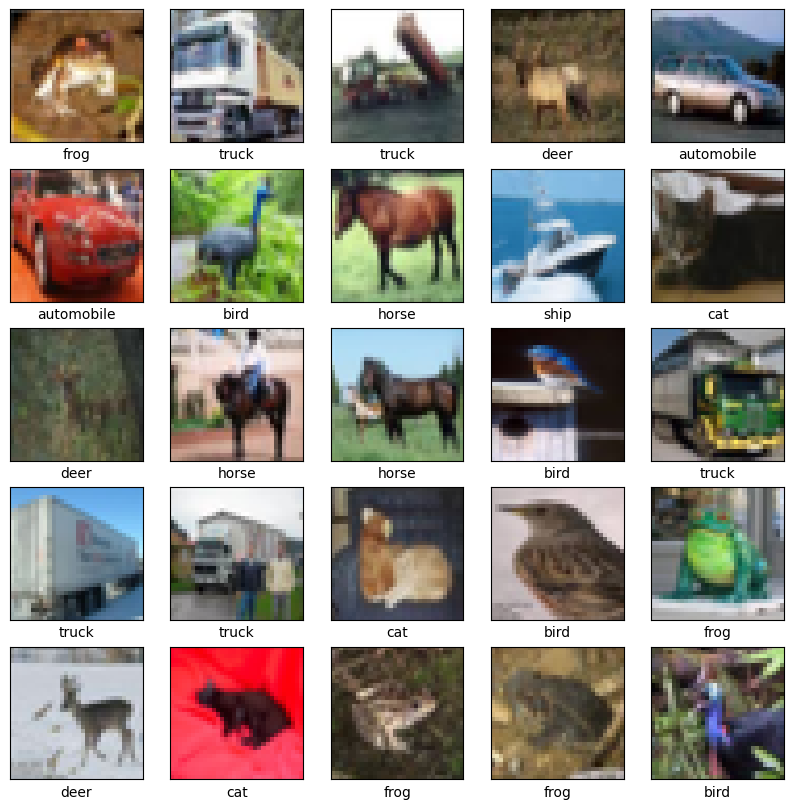

In [24]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
       'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  # The CIFAR labels happen to be arrays,
  # which is why you need the extra index
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

**Langkah 4 - Buat Model CNN**

**Langkah 4.1. - Buat Layer Konvolusi**

In [25]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

**Langkah 4.2. - Cek Arsitektur Konvolusi**

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

**Langkah 4.3. - Tambahkan Layer Fully Connected**

In [27]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

**Langkah 4.4. - Cek Arsitektur Model CNN**

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

**Langkah 4.5. - Compile Model CNN**

In [29]:
model.compile(optimizer='adam',
       loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
       metrics=['accuracy'])

**Langkah 5 - Fit Model**

In [30]:
history = model.fit(train_images, train_labels, epochs=10,
          validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 12s 6ms/step - loss: 1.5158 - accuracy: 0.4440 - val_loss: 1.2473 - val_accuracy: 0.5553
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1411 - accuracy: 0.5976 - val_loss: 1.0463 - val_accuracy: 0.6348
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9821 - accuracy: 0.6564 - val_loss: 0.9658 - val_accuracy: 0.6649
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8873 - accuracy: 0.6877 - val_loss: 0.9461 - val_accuracy: 0.6753
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8124 - accuracy: 0.7169 - val_loss: 0.8589 - val_accuracy: 0.7009
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7535 - accuracy: 0.7345 - val_loss: 0.8502 - val_accuracy: 0.7040
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7058 - accuracy: 0.7511 - val_loss: 0.8543 - val_accuracy

**Langkah 6 - Evaluasi Model**

313/313 - 1s - loss: 0.8665 - accuracy: 0.7149 - 958ms/epoch - 3ms/step


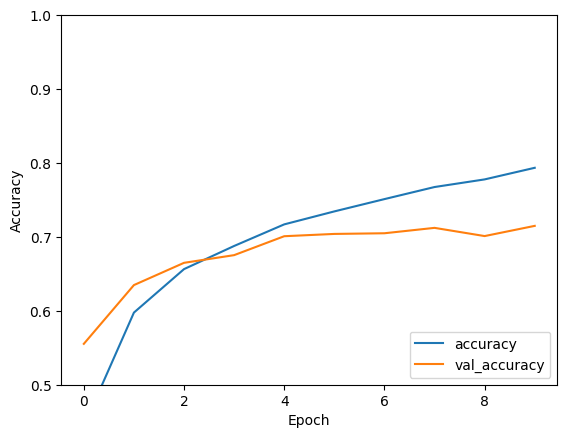

In [31]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

**Langkah 7 - Cetak Hasil Akurasi**

In [32]:
print(test_acc)

0.714900016784668


Dari praktikum di atas menghasilkan hasil akurasi sebesar 0.6912000179290771

**TUGAS 1**

**Import Library**

In [33]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout

**Load Dataset**

In [34]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

**Sample Images**

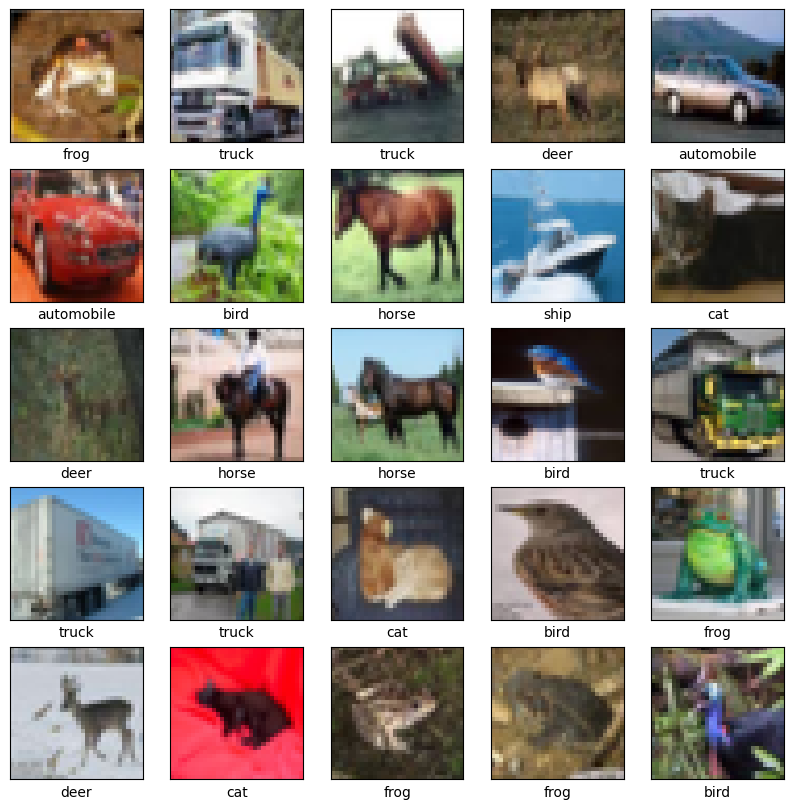

In [35]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
       'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  # The CIFAR labels happen to be arrays,
  # which is why you need the extra index
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

**Membuat Model CNN**

In [36]:
# Model definition
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(10, activation='softmax'))

# Model compilation
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model training
history = model.fit(train_images, train_labels, epochs=100,
                    validation_data=(test_images, test_labels))

Epoch 1/100
1563/1563 [==============================] - 23s 10ms/step - loss: 3.0532 - accuracy: 0.2900 - val_loss: 2.4105 - val_accuracy: 0.4295
Epoch 2/100
1563/1563 [==============================] - 16s 10ms/step - loss: 2.5611 - accuracy: 0.3923 - val_loss: 2.2043 - val_accuracy: 0.4927
Epoch 3/100
1563/1563 [==============================] - 16s 10ms/step - loss: 2.3398 - accuracy: 0.4483 - val_loss: 2.1570 - val_accuracy: 0.5025
Epoch 4/100
1563/1563 [==============================] - 16s 10ms/step - loss: 2.1659 - accuracy: 0.4841 - val_loss: 2.0185 - val_accuracy: 0.5361
Epoch 5/100
1563/1563 [==============================] - 16s 10ms/step - loss: 2.0212 - accuracy: 0.5140 - val_loss: 1.9673 - val_accuracy: 0.5360
Epoch 6/100
1563/1563 [==============================] - 16s 10ms/step - loss: 1.8957 - accuracy: 0.5449 - val_loss: 1.8960 - val_accuracy: 0.5414
Epoch 7/100
1563/1563 [==============================] - 16s 10ms/step - loss: 1.7807 - accuracy: 0.5668 - val_loss: 1

**Cek Arsitektur Konvolusi**

In [37]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 30, 30, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 13, 13, 64)       

**Evaluasi Model**

313/313 - 1s - loss: 0.6737 - accuracy: 0.8175 - 904ms/epoch - 3ms/step


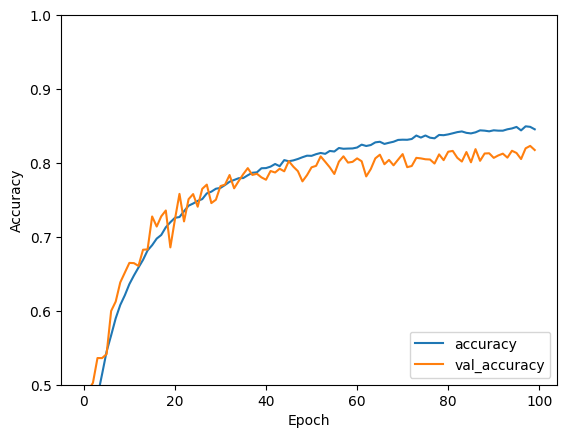

In [38]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

**Cetak Hasil Akurasi**

In [39]:
print("Akurasi: {:.2%}".format(test_acc))

Akurasi: 81.75%


Model sebelumnya menghasilkan akurasi sebesar 68.33%. Oleh karena itu saya menambahkan beberapa hal berikut sehingga akurasinya meningkat menjadi 81.79%.

**TUGAS 2**

In [41]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Memuat dataset MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [42]:
# Normalisasi gambar ke rentang [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

In [43]:
# Perbaikan: Mengimpor to_categorical dari tensorflow.keras.utils
from tensorflow.keras.utils import to_categorical

# Mengonversi label ke format one-hot encoding
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)


In [44]:
# Menampilkan informasi tentang dataset
print("Jumlah data latihan:", len(train_images))
print("Jumlah data pengujian:", len(test_images))
print("Ukuran gambar:", train_images[0].shape)

Jumlah data latihan: 60000
Jumlah data pengujian: 10000
Ukuran gambar: (28, 28)


In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Membangun model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [46]:
# Mengompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [47]:
# Menampilkan ringkasan model
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_7 (Dense)             (None, 128)              

In [48]:
# Melatih model
history = model.fit(train_images, train_labels, epochs=10, batch_size=128, verbose=2, validation_split=0.3)

Epoch 1/10
329/329 - 5s - loss: 0.3619 - accuracy: 0.8886 - val_loss: 0.0864 - val_accuracy: 0.9735 - 5s/epoch - 14ms/step
Epoch 2/10
329/329 - 2s - loss: 0.0986 - accuracy: 0.9704 - val_loss: 0.0634 - val_accuracy: 0.9809 - 2s/epoch - 6ms/step
Epoch 3/10
329/329 - 2s - loss: 0.0710 - accuracy: 0.9783 - val_loss: 0.0500 - val_accuracy: 0.9851 - 2s/epoch - 5ms/step
Epoch 4/10
329/329 - 2s - loss: 0.0551 - accuracy: 0.9836 - val_loss: 0.0513 - val_accuracy: 0.9851 - 2s/epoch - 6ms/step
Epoch 5/10
329/329 - 2s - loss: 0.0441 - accuracy: 0.9866 - val_loss: 0.0493 - val_accuracy: 0.9856 - 2s/epoch - 6ms/step
Epoch 6/10
329/329 - 3s - loss: 0.0376 - accuracy: 0.9889 - val_loss: 0.0469 - val_accuracy: 0.9862 - 3s/epoch - 8ms/step
Epoch 7/10
329/329 - 3s - loss: 0.0319 - accuracy: 0.9900 - val_loss: 0.0500 - val_accuracy: 0.9862 - 3s/epoch - 8ms/step
Epoch 8/10
329/329 - 2s - loss: 0.0289 - accuracy: 0.9907 - val_loss: 0.0418 - val_accuracy: 0.9886 - 2s/epoch - 6ms/step
Epoch 9/10
329/329 - 2s

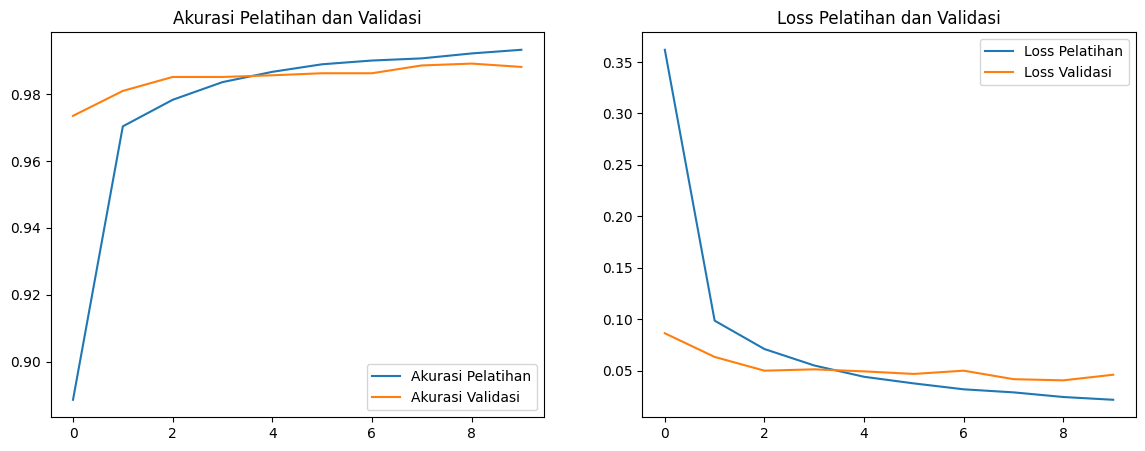

In [49]:
import matplotlib.pyplot as plt

# Plot sejarah pelatihan
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Akurasi Pelatihan')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.legend(loc='lower right')
plt.title('Akurasi Pelatihan dan Validasi')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Pelatihan')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.legend(loc='upper right')
plt.title('Loss Pelatihan dan Validasi')

plt.show()

In [50]:
# Evaluasi model pada kumpulan data uji
validation_loss, validation_accuracy = model.evaluate(test_images, test_labels, verbose=False)
print("Loss Validasi:", validation_loss)
print("Akurasi Validasi:", validation_accuracy)

Loss Validasi: 0.041775550693273544
Akurasi Validasi: 0.9868000149726868


In [51]:
# Menghasilkan nilai prediksi pada kumpulan data uji
y_pred_enc = model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [52]:
# Mendekode nilai prediksi
y_pred = [np.argmax(i) for i in y_pred_enc]

In [53]:
# Menampilkan laporan klasifikasi
print(classification_report(np.argmax(test_labels, axis=1), y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      0.99      0.99      1135
           2       0.98      1.00      0.99      1032
           3       0.96      1.00      0.98      1010
           4       1.00      0.98      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



Text(58.222222222222214, 0.5, 'Aktual')

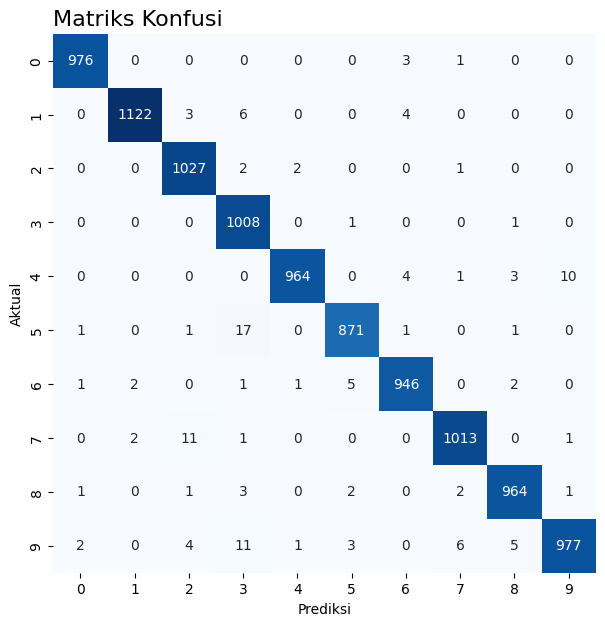

In [54]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Membuat matriks konfusi dan menampilkannya dengan heatmap
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(confusion_matrix(np.argmax(test_labels, axis=1), y_pred), annot=True, cbar=False, fmt='1d', cmap='Blues', ax=ax)
ax.set_title('Matriks Konfusi', loc='left', fontsize=16)
ax.set_xlabel('Prediksi')
ax.set_ylabel('Aktual')

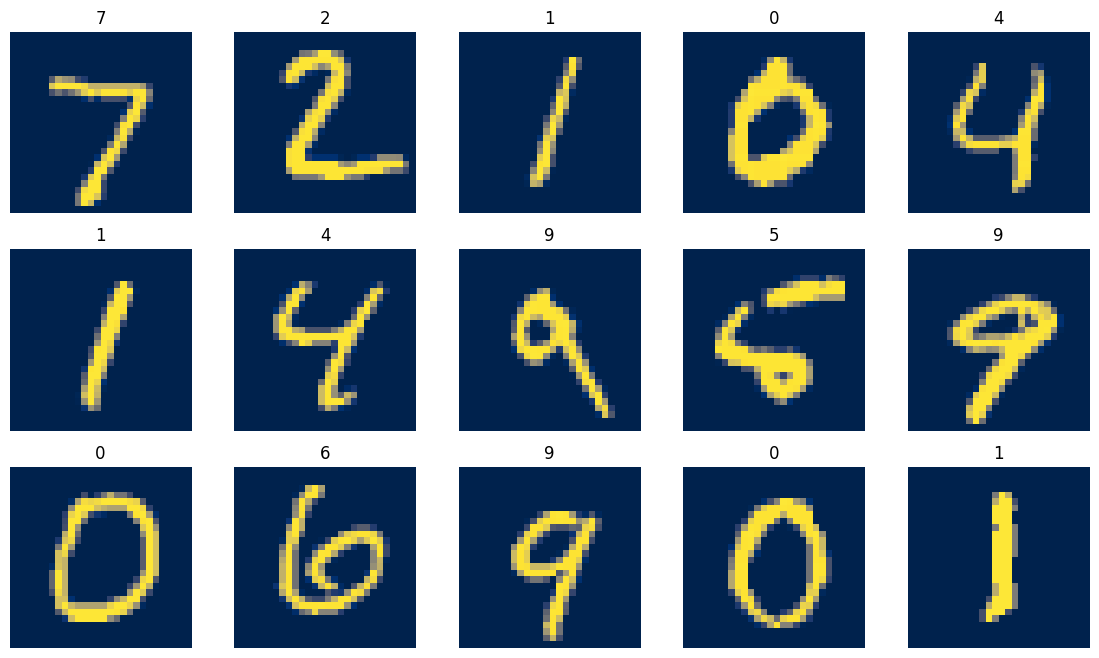

In [55]:
# Menampilkan target yang diprediksi pada setiap gambar
# (label di atas gambar adalah label yang diprediksi)
plt.figure(figsize=(14, 8))
for ind, row in enumerate(test_images[:15]):
    plt.subplot(3, 5, ind+1)
    plt.title(y_pred[ind])
    img = row.reshape(28, 28)
    plt.axis('off')
    plt.imshow(img, cmap='cividis')